Average number of steps to return to origin: 376.427


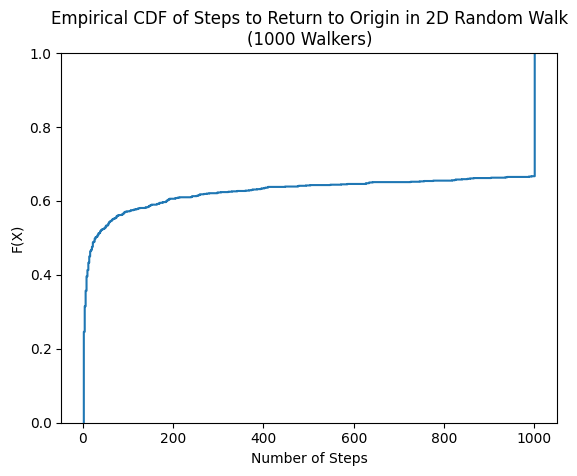

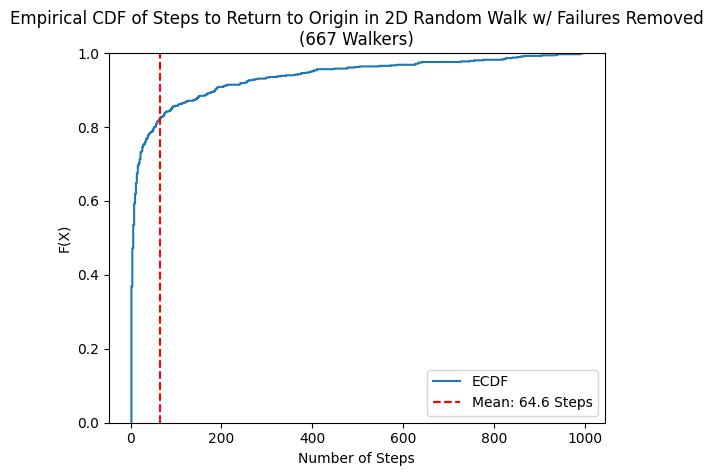

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

SEED = 42
random.seed(SEED)

# number of simulations
N = 1_000

# Max allowable steps
MAX_STEPS = 1_000

step_counts = []
step_counts_omit_failures = []

for _sim in range(N):

    step_count = 0
    current_pos = [0,0]

    while (current_pos != [0,0] or step_count == 0) and step_count <= MAX_STEPS:
        step_count += 1

        draw = random.randint(1, 4)

        if draw == 1: # up
            current_pos[0] += 1
        elif draw == 2: # down
            current_pos[0] -= 1
        elif draw == 3: # left
            current_pos[1] -= 1
        else: # right
            current_pos[1] += 1

    step_counts.append(step_count)
    if step_count <= MAX_STEPS:
        step_counts_omit_failures.append(step_count)


_ = plt.figure()
_ = plt.ecdf(step_counts)
_ = plt.xlabel("Number of Steps")
_ = plt.ylabel("F(X)")
_ = plt.title(f"Empirical CDF of Steps to Return to Origin in 2D Random Walk\n({len(step_counts)} Walkers)")

_ = plt.figure()
_ = plt.ecdf(step_counts_omit_failures)
_ = plt.axvline(np.mean(step_counts_omit_failures), color='r', linestyle='dashed') # mark the mean
_ = plt.xlabel("Number of Steps")
_ = plt.ylabel("F(X)")
_ = plt.title(f"Empirical CDF of Steps to Return to Origin in 2D Random Walk w/ Failures Removed\n({len(step_counts_omit_failures)} Walkers)")
_ = plt.legend(["ECDF", f"Mean: {np.mean(step_counts_omit_failures):.1f} Steps"])
